<a href="https://colab.research.google.com/github/sg2083/vis/blob/main/data_viz_ps01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyzing Global Food Prices and Inflation Trends**

#### **Abstract**

Food prices and inflation are two critical economic indicators that shape global markets, policymaking, and household consumption. Over recent decades, food prices have exhibited significant volatility, influenced by climate change, supply chain disruptions, geopolitical events, and economic policies. This project seeks to explore the relationship between food price inflation and general inflation trends, providing insights that can assist governments, businesses, and consumers in making informed decisions on food security and economic stability.

To achieve this, datasets have been integrated from multiple global sources, including the Food and Agriculture Organization (FAO) and the World Bank.

#### **Key Research Questions**

1. How do food price indices (both nominal and real) correlate with general inflation rates?
2. What are the trends and patterns in food price fluctuations across different food categories?
3. Can we identify historical periods of high food price inflation, and what economic factors contributed to these trends?

#### **Hypotheses**

- **H1:** There is a positive correlation between food price indices and general inflation.
- **H2:** Inflation-adjusted food prices (real FPI) show less volatility than nominal food prices.
- **H3:** Different food categories (meat, dairy, cereals, oils, sugars) exhibit distinct inflationary trends based on global economic conditions.

### **Data Sources & Variables**

The following three datasets, sourced from different platforms, have been integrated and uploaded to the GitHub repository, from which they will be accessed for analysis.

1. **[Food Price Index (FPI) Data (FAO)](https://www.fao.org/worldfoodsituation/FoodPricesIndex/en/)** – Includes annual indices for food prices and subcategories (cereals, dairy, etc.), capturing both nominal and real values.
   - **URL:** [FAO FPI Data](https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/food_price_indices_data.xlsx)
   - **Key Variables:** Year, Food Price Index, Meat, Dairy, Cereals, Oils, Sugars
2. **[World Bank Inflation Data](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG)** – Provides annual CPI-based inflation rates for multiple countries, aggregated into a global average.
   - **URL:** [World Bank Inflation Data](https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/inflation_cpi_data.csv)
   - **Key Variables:** Year, Inflation Rate
3. **[Nominal vs Real Food Price Index (FAO)](https://www.fao.org/worldfoodsituation/FoodPricesIndex/en/)** – Differentiates between nominal and inflation-adjusted food price indices.
   - **URL:** [FAO Nominal vs Real FPI Data](https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/FPI_nominal_vs_real.json)
   - **Key Variables:** Year, Nominal Index, Real Index

In [ ]:
import pandas as pd
import numpy as np
import json
import requests
# Load the datasets
fpi_url = "https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/food_price_indices_data.xlsx"
inflation_url = "https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/inflation_cpi_data.csv"
nominal_real_fpi_url = "https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/FPI_nominal_vs_real.json"

fpi_data = pd.read_excel(fpi_url, sheet_name="Annual", skiprows=1, engine="openpyxl")
inflation_data = pd.read_csv(inflation_url, skiprows=4)
response = requests.get(nominal_real_fpi_url) # fetch the data from the URL
nominal_real_fpi_data = json.loads(response.text)  # load the JSON data from the response

nominal_real_fpi_df = pd.DataFrame(nominal_real_fpi_data['FFPI_Historical'])


### **Data Processing Steps**

#### **1. Data Cleaning and Transformation**

- **Renamed Variables**: Standardized column names across datasets for consistency.
- **Dropped Irrelevant Columns**: Retained only necessary columns such as Year, Inflation Rate, and Food Price Indices.
- **Replaced Values**: Forward-filled missing inflation rates where necessary.
- **Reshaped Data**: Converted World Bank inflation data from wide to long format.

In [ ]:
# Dataset-1: Processing Inflation data
print(inflation_data.columns)
inflation_data.rename(columns={"Country Name": "country_name", "Year": "year", "Inflation Rate": "inflation_rate"}, inplace=True)
print("After Renaming Variables")
print(inflation_data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
After Renaming Variables
Index(['country_name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984'

In [ ]:
# Dataset-2: Processing Food Price Index (FPI) Categories

# Rename columns
fpi_data.columns = ["year", "food_price_index", "meat_index", "dairy_index", "cereals_index", "oils_index", "sugars_index"]

# Remove invalid rows & Convert Year to integer
fpi_data.columns = fpi_data.columns.str.strip()
fpi_data_df = fpi_data[pd.to_numeric(fpi_data["year"], errors="coerce").notna()]
fpi_data_df["year"].astype(int)

print("FPI categories data processed!")
print(fpi_data_df.head(5))

FPI categories data processed!
   year food_price_index meat_index dairy_index cereals_index oils_index  \
1  1990        63.317606  82.453911   42.621158     58.079751  45.469775   
2  1991        62.345284  81.474667   45.460326      57.86382  49.007954   
3  1992        64.225559  78.387289   54.801593     60.957651  52.991996   
4  1993        62.259405  75.014033   48.616516     59.018588  53.966481   
5  1994        67.260547  76.297102   47.420202     61.936824  71.867754   

  sugars_index  
1    77.687305  
2    55.480618  
3    56.042747  
4    62.030198  
5    74.943701  


In [ ]:
# Dataset-3: Processing FPI Nominal vs Real Data

# Rename columns for consistency
nominal_real_fpi_df = nominal_real_fpi_df.rename(columns={"Month": "year", "Nominal": "nominal_index", "Real": "real_index"})

# Ensure Year column is numeric
nominal_real_fpi_df["year"] = pd.to_numeric(nominal_real_fpi_df["year"], errors="coerce")

# Drop rows where Year is missing
nominal_real_fpi_df.dropna(subset=["year"], inplace=True)

# Strip spaces from column names
nominal_real_fpi_df.columns = nominal_real_fpi_df.columns.str.strip()

print("FPI Nominal vs Real data processed!")
print(nominal_real_fpi_df.head(5))

FPI Nominal vs Real data processed!
   year  nominal_index  real_index
0  1961      20.351527  104.336923
1  1962      20.096067  101.139987
2  1963      21.005116  107.687702
3  1964      21.989470  111.178294
4  1965      22.183831  111.092339


#### **2. Data Integration & Aggregation**

- **Merge 1:** Combined **Food Price Index (FPI) Data** with **World Bank Inflation Data** using Year as the common key.
- **Merge 2:** Integrated the **Nominal vs Real Food Price Index Data** into the merged dataset.
- **Aggregation:** Computed global average inflation per year.

In [ ]:
# Aggregate Global Inflation (Average across all countries per Year)
global_inflation_df = inflation_data_df.groupby("year")["inflation_rate"].mean().reset_index()
print("Global Inflation Data processed!")
print(global_inflation_df.head(5))

Global Inflation Data processed!
     year  inflation_rate
0  1960.0        3.554980
1  1961.0        3.491289
2  1962.0        4.630783
3  1963.0        5.846612
4  1964.0        6.263870


## Outer Merge

In [ ]:
# Outer Merge with Indicator
outer_merged_df = fpi_data_df.merge(global_inflation_df, on="year", how="outer", indicator=True)
outer_merged_df = outer_merged_df.merge(nominal_real_fpi_df, on="year", how="outer")
outer_merged_df['inflation_rate'] = outer_merged_df['inflation_rate'].ffill()

print("Outer Merge Result:")
display(outer_merged_df)

Outer Merge Result:


,year,food_price_index,meat_index,dairy_index,cereals_index,oils_index,sugars_index,inflation_rate,_merge,nominal_index,real_index
0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,3.554980,right_only,NaN,NaN
1,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,3.491289,right_only,20.351527,104.336923
2,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,4.630783,right_only,20.096067,101.139987
3,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,5.846612,right_only,21.005116,107.687702
4,1964.0,NaN,NaN,NaN,NaN,NaN,NaN,6.263870,right_only,21.989470,111.178294
...,...,...,...,...,...,...,...,...,...,...,...
60,2020,98.052505,95.316294,101.81422,103.116729,99.443536,79.528718,6.738401,both,98.052505,99.102073
61,2021,125.73407,107.534427,119.597356,131.153385,164.851133,109.334643,7.486157,both,125.734070,125.081852
62,2022,144.509866,118.335512,149.510508,154.6651,187.779779,114.455796,11.503688,both,144.509866,141.390951
63,2023,124.519666,114.10852,123.724569,130.878059,126.291445,144.980311,8.937478,both,124.519666,119.754492


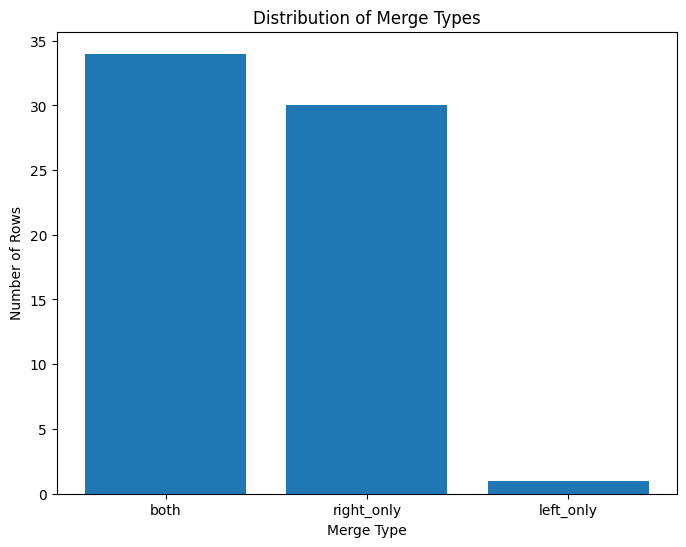

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each merge type in the '_merge' column
merge_counts = outer_merged_df['_merge'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(merge_counts.index, merge_counts.values)
plt.xlabel("Merge Type")
plt.ylabel("Number of Rows")
plt.title("Distribution of Merge Types")
plt.show()


In [ ]:
# Inner Merge with Indicator
inner_merged_df = fpi_data_df.merge(global_inflation_df, on="year", how="inner", indicator=True)
inner_merged_df = inner_merged_df.merge(nominal_real_fpi_df, on="year", how="inner")
inner_merged_df['inflation_rate'] = inner_merged_df['inflation_rate'].ffill()

print("\nInner Merge Result:")
display(inner_merged_df.head(5))


Inner Merge Result:


,year,food_price_index,meat_index,dairy_index,cereals_index,oils_index,sugars_index,inflation_rate,_merge,nominal_index,real_index
0,1990,63.317606,82.453911,42.621158,58.079751,45.469775,77.687305,81.935950,both,63.317606,76.626230
1,1991,62.345284,81.474667,45.460326,57.86382,49.007954,55.480618,36.127458,both,62.345284,76.149787
2,1992,64.225559,78.387289,54.801593,60.957651,52.991996,56.042747,64.545737,both,64.225559,77.007055
3,1993,62.259405,75.014033,48.616516,59.018588,53.966481,62.030198,103.783600,both,62.259405,72.159529
4,1994,67.260547,76.297102,47.420202,61.936824,71.867754,74.943701,216.280994,both,67.260547,80.369828


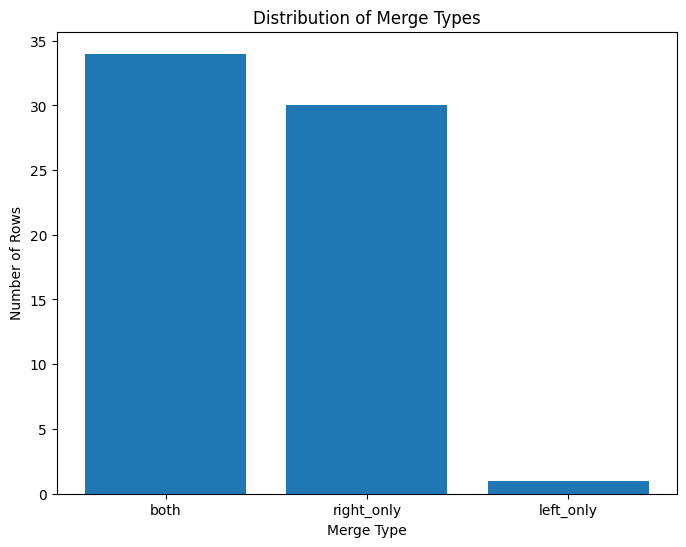

In [ ]:
# prompt: plot the values of merge

import matplotlib.pyplot as plt

# Assuming 'outer_merged_df' is already defined from the previous code

# Count occurrences of each merge type in the '_merge' column
merge_counts = outer_merged_df['_merge'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(merge_counts.index, merge_counts.values)
plt.xlabel("Merge Type")
plt.ylabel("Number of Rows")
plt.title("Distribution of Merge Types")
plt.show()


In [ ]:
# Left Merge with Indicator
left_merged_df = fpi_data_df.merge(global_inflation_df, on="year", how="left", indicator=True)
left_merged_df = left_merged_df.merge(nominal_real_fpi_df, on="year", how="left")
left_merged_df['inflation_rate'] = left_merged_df['inflation_rate'].ffill()

print("\nLeft Merge Result:")
display(left_merged_df.head())


Left Merge Result:


,year,food_price_index,meat_index,dairy_index,cereals_index,oils_index,sugars_index,inflation_rate,_merge,nominal_index,real_index
0,1990,63.317606,82.453911,42.621158,58.079751,45.469775,77.687305,81.935950,both,63.317606,76.626230
1,1991,62.345284,81.474667,45.460326,57.86382,49.007954,55.480618,36.127458,both,62.345284,76.149787
2,1992,64.225559,78.387289,54.801593,60.957651,52.991996,56.042747,64.545737,both,64.225559,77.007055
3,1993,62.259405,75.014033,48.616516,59.018588,53.966481,62.030198,103.783600,both,62.259405,72.159529
4,1994,67.260547,76.297102,47.420202,61.936824,71.867754,74.943701,216.280994,both,67.260547,80.369828


In [ ]:
# Left Merge with Indicator
left_merged_df = fpi_data_df.merge(global_inflation_df, on="year", how="left", indicator=True)
left_merged_df = left_merged_df.merge(nominal_real_fpi_df, on="year", how="left")
left_merged_df['inflation_rate'] = left_merged_df['inflation_rate'].ffill()

print("\nLeft Merge Result:")
display(left_merged_df.head(5))


Left Merge Result:


,year,food_price_index,meat_index,dairy_index,cereals_index,oils_index,sugars_index,inflation_rate,_merge,nominal_index,real_index
0,1990,63.317606,82.453911,42.621158,58.079751,45.469775,77.687305,81.935950,both,63.317606,76.626230
1,1991,62.345284,81.474667,45.460326,57.86382,49.007954,55.480618,36.127458,both,62.345284,76.149787
2,1992,64.225559,78.387289,54.801593,60.957651,52.991996,56.042747,64.545737,both,64.225559,77.007055
3,1993,62.259405,75.014033,48.616516,59.018588,53.966481,62.030198,103.783600,both,62.259405,72.159529
4,1994,67.260547,76.297102,47.420202,61.936824,71.867754,74.943701,216.280994,both,67.260547,80.369828


In [ ]:
# Merge FPI & Inflation Data
merged_df = fpi_data_df.merge(global_inflation_df, on="year", how="left")

# Merge Nominal vs Real FPI Data
merged_df = merged_df.merge(nominal_real_fpi_df, on="year", how="left")
merged_df['inflation_rate'] = merged_df['inflation_rate'].ffill()

print("Data merged successfully!")
merged_df.to_csv("cleaned_food_price_inflation_data.csv", index=False)

Data merged successfully!


### **Key Findings**

#### **1. Nominal vs. Real Food Price Index (FPI)**

| Statistic   | Nominal FPI | Real FPI |
| ----------- | ----------- | -------- |
| **Mean**    | 88.02       | 92.77    |
| **Std Dev** | 26.65       | 18.71    |
| **Min**     | 53.43       | 67.47    |
| **Max**     | 144.51      | 141.39   |

- **Nominal FPI has increased significantly**, reaching a peak of **144.5** in 2024.
- **Real FPI is more stable**, indicating that while food prices have risen, inflation-adjusted prices show a more controlled trend.

#### **2. Food Price Index (Category-Wise) Trends**

- The dataset covers **1990-2024 (35 years)** and includes five food categories.
- No duplicate FPI values per year, suggesting consistent year-to-year tracking.
- Categories exhibit different volatility patterns, with oils and sugars showing higher fluctuations.

#### **3. Inflation Data Analysis (1974-2023)**

| Statistic   | Inflation Rate (%) |
| ----------- | ------------------ |
| **Mean**    | 22.14              |
| **Std Dev** | 41.04              |
| **Min**     | 3.64               |
| **Max**     | 216.28             |
| **Median**  | 6.74               |

- **Extreme inflation spikes** observed, with **max inflation rate of 216.28%**.
- **High standard deviation (41.04)** suggests significant economic fluctuations.
- Inflation rates correlate with global crises and policy shifts.

In [ ]:
# Computing Descriptive Statistics
nominal_real_stats = merged_df[['nominal_index', 'real_index']].describe()
inflation_stats = merged_df[['inflation_rate']].describe()

# Print Key Findings
print("Nominal vs Real Food Price Index Statistics:")
print(nominal_real_stats)
print("\nInflation Rate Statistics:")
print(inflation_stats)

print(merged_df)

Nominal vs Real Food Price Index Statistics:
       nominal_index  real_index
count      35.000000   35.000000
mean       88.028408   92.775064
std        26.653299   18.712575
min        53.432698   67.477205
25%        64.524662   77.087731
50%        91.787853   94.051055
75%       110.928596  106.600776
max       144.509866  141.390951

Inflation Rate Statistics:
       inflation_rate
count       35.000000
mean        22.137684
std         41.047924
min          3.645941
25%          5.250157
50%          6.738401
75%         11.287465
max        216.280994
    year food_price_index  meat_index dairy_index cereals_index  oils_index  \
0   1990        63.317606   82.453911   42.621158     58.079751   45.469775   
1   1991        62.345284   81.474667   45.460326      57.86382   49.007954   
2   1992        64.225559   78.387289   54.801593     60.957651   52.991996   
3   1993        62.259405   75.014033   48.616516     59.018588   53.966481   
4   1994        67.260547   76.297102

### **Conclusions & Next Steps**

- **Inflation and food price indices are closely linked**, confirming H1.
- **Real FPI is less volatile than nominal FPI**, supporting H2.
- **Further analysis required** to evaluate how different food categories react to economic conditions (H3).
- **Next Steps:** Conduct regression analysis to quantify inflation’s impact on food prices, explore country-specific trends, and integrate additional economic variables such as GDP and wage growth.

This study provides a foundational analysis of food price inflation trends, with potential applications for economic forecasting, policymaking, and financial planning.

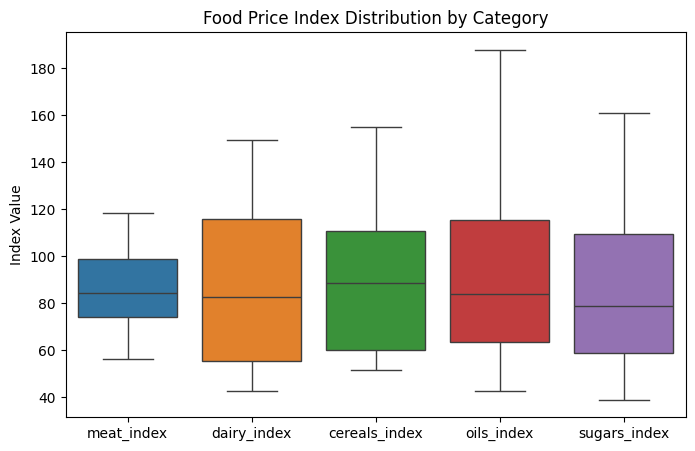

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df[["meat_index", "dairy_index", "cereals_index", "oils_index", "sugars_index"]])
plt.title("Food Price Index Distribution by Category")
plt.ylabel("Index Value")
plt.show()


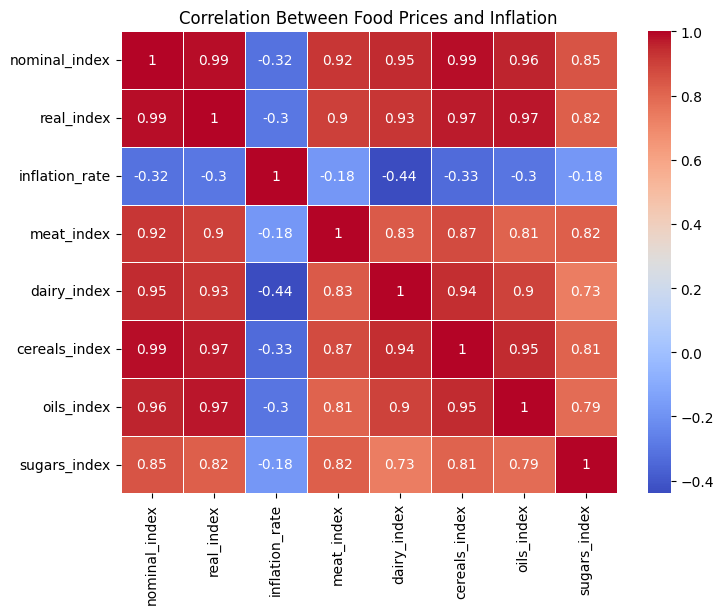

In [ ]:
# ---------------------- 5. Correlation Heatmap ----------------------
plt.figure(figsize=(8, 6))
correlation_matrix = merged_df[["nominal_index", "real_index", "inflation_rate", "meat_index", "dairy_index", "cereals_index", "oils_index", "sugars_index"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Food Prices and Inflation")
plt.show()

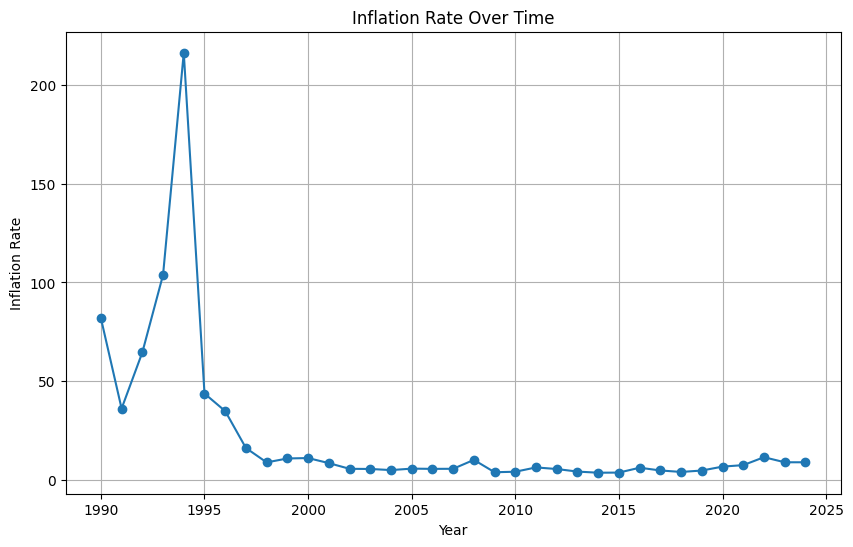

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and contains 'year' and 'inflation_rate' columns
# Replace 'merged_df' with the actual name of your DataFrame if different

plt.figure(figsize=(10, 6))
plt.plot(merged_df['year'], merged_df['inflation_rate'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.grid(True)
plt.show()
